# Variational Method for Quantum Mechanics

The variational method is a powerful technique in quantum mechanics to estimate the ground-state energy of a system. It is based on the variational principle, which states that for any trial wavefunction $\psi_{trial}$, the expectation value of the Hamiltonian provides an upper bound to the true ground-state energy $E_0$:
$$
E[\psi_{trial}] = \frac{\langle \psi_{trial} | \hat{H} | \psi_{trial} \rangle}{\langle \psi_{trial} | \psi_{trial} \rangle} \geq E_0.
$$

By choosing a trial wavefunction with adjustable parameters, one can minimize $E[\psi_{trial}]$ to approximate $E_0$.

In this notebook, we apply the variational method to estimate the ground-state energy of the hydrogen atom.

We take dimensionlesss units where the length unit is given by the Bohr radius,
$$
a_0 = \frac{4 \pi \varepsilon_0 \hbar^2}{\mu e^2},
$$
and the energy units are in terms of
$$
E_0 = \frac{\hbar^2}{\mu a_0^2} = -27.2 \text{ eV}.
$$

The trial wavefunction is chosen as
$$
\psi_\alpha(r) = e^{-\alpha r},
$$
where $\alpha$ is a variational parameter. The Hamiltonian for the hydrogen atom in dimensionless units is given by
$$
\hat{H} = -\frac{1}{2} \nabla^2 - \frac{1}{r}.
$$
The kinetic energy term is derived from the Laplacian operator acting on the trial wavefunction, and includes an additional term due to the radial part of the Laplacian in spherical coordinates:
$$
T = -\frac{1}{2} \nabla^2 \psi_\alpha(r) = -\frac{1}{2} \alpha^2 e^{-\alpha r} + \frac{\alpha}{r} e^{-\alpha r}.
$$

The potential energy term arises from the Coulomb potential:
$$
V = -\frac{1}{r} \psi_\alpha(r) = -\frac{1}{r} e^{-\alpha r}.
$$

We vary $\alpha$ in the range $0.7 \leq \alpha \leq 1.3$ in steps of $0.1$ and compute the corresponding energies.

In [2]:
import numpy as np
from scipy.integrate import quad

# Define the trial wavefunction
def trial_wavefunction(r, alpha):
    return np.exp(-alpha * r)

# Define the Hamiltonian operator
def hamiltonian(r, alpha):
    psi = trial_wavefunction(r, alpha)
    kinetic = -0.5 * alpha**2 * psi
    kinetic += (1 / r) * alpha * psi
    potential = -psi / r
    return psi * (kinetic + potential)

# Variational method to estimate ground-state energy
def variational_energy(alpha):
    numerator = quad(lambda r: r**2 * hamiltonian(r, alpha), 0, np.inf, limit=100)[0]
    denominator = quad(lambda r: r**2 * trial_wavefunction(r, alpha)**2, 0, np.inf, limit=10)[0]
    return numerator / denominator

# Vary alpha and compute energies
alphas = np.arange(0.7, 1.4, 0.1)
energies = [variational_energy(alpha) for alpha in alphas]

# Print results
for alpha, energy in zip(alphas, energies):
    print(f'Alpha: {alpha:.1f}, Energy: {energy:.5f}')

Alpha: 0.7, Energy: -0.45500
Alpha: 0.8, Energy: -0.48000
Alpha: 0.9, Energy: -0.49500
Alpha: 1.0, Energy: -0.50000
Alpha: 1.1, Energy: -0.49500
Alpha: 1.2, Energy: -0.48000
Alpha: 1.3, Energy: -0.45500


We find that the minimum energy is -0.5, which occurs at $\alpha = 1.0$. This result aligns with the variational principle, as the energy is minimized for the optimal value of the variational parameter $\alpha$.

## Variational Monte Carlo

Variational Monte Carlo (VMC) is a stochastic method to estimate the ground-state energy of a quantum system. It combines the variational principle with Monte Carlo integration to evaluate the expectation value of the Hamiltonian. This method is particularly useful for high-dimensional systems where analytical integration is infeasible.

<!-- In this example, we use VMC to estimate the ground-state energy of the hydrogen atom. The trial wavefunction is the same as before:
$$
\psi(r) = e^{-\alpha r},
$$
where $\alpha$ is the variational parameter.  -->
The expectation value of the Hamiltonian is computed using Monte Carlo integration:
$$
E[\psi_{trial}] = \frac{\int \psi_{trial}(r) \hat{H} \psi_{trial}(r) \, d^3r}{\int \psi_{trial}(r)^2 \, d^3r}.
$$

We sample points $r$ from the probability density $|\psi_{trial}(r)|^2$ and compute the local energy at each point:
$$
E_{local}(r) = \frac{\hat{H} \psi_{trial}(r)}{\psi_{trial}(r)}.
$$
The ground-state energy is then approximated as the average of the local energies over the sampled points.

The key element here is to be able to sample from the distribution $|\psi_{trial}(r)|^2$.
In general it is a non-trivial task, especially for high-dimensional systems and a Metropolis algorithm can be used for this purpose.
In some cases, the sampling can be performed explicitly, however.

## Hydrogen Atom and Variational Monte Carlo


In this notebook, we use the variational method and Variational Monte Carlo (VMC) to estimate the ground-state energy of the hydrogen atom. The trial wavefunction, as before, is chosen as:
$$
\psi_\alpha(r) = e^{-\alpha r},
$$
where $\alpha$ is a variational parameter. 

The local energy, $E_{local}(r) = \frac{\hat{H} \psi_{trial}(r)}{\psi_{trial}(r)}$, reads
$$
E_{local}(r) = -\frac{1}{2} \alpha^2 + \frac{\alpha}{r} - \frac{1}{r}.
$$

This method is particularly useful for systems where analytical integration is infeasible, as it allows us to estimate the energy using stochastic sampling.

To apply the method, we need to sample the radial coordinate for the probability distribution
$$
P_r(r; \alpha) \propto r^2 \exp(-2 \alpha r).
$$
This a partial case of the Gamma distribution with $k = 3$ and scale factor $1/(2\alpha)$.


Alpha: 0.7, Mean Energy: -0.45414, Variance: 0.03601, Error: 0.00190
Alpha: 0.7999999999999999, Mean Energy: -0.47891, Variance: 0.02227, Error: 0.00149
Alpha: 0.8999999999999999, Mean Energy: -0.49567, Variance: 0.00710, Error: 0.00084
Alpha: 0.9999999999999999, Mean Energy: -0.50000, Variance: 0.00000, Error: 0.00000
Alpha: 1.0999999999999999, Mean Energy: -0.49373, Variance: 0.01236, Error: 0.00111
Alpha: 1.1999999999999997, Mean Energy: -0.47883, Variance: 0.05781, Error: 0.00240
Alpha: 1.2999999999999998, Mean Energy: -0.45162, Variance: 0.15036, Error: 0.00388


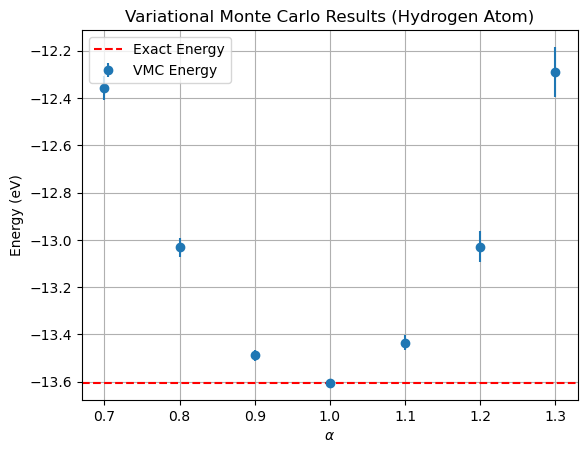

In [7]:
import numpy as np
import scipy.optimize


# Define the local energy
def local_energy(r, alpha):
    kinetic = -0.5 * alpha**2
    kinetic += (1 / r) * alpha
    potential = -1 / r
    return kinetic + potential

# Variational Monte Carlo
def variational_monte_carlo(alpha, n_samples):
    samples = np.random.gamma(shape=3, scale=1/(2.*alpha), size=n_samples)
    local_energies = [local_energy(r, alpha) for r in samples]
    return np.mean(local_energies), np.var(local_energies), np.std(local_energies) / np.sqrt(n_samples)

# Vary alpha and compute energies
alphas = np.arange(0.7, 1.4, 0.1)
n_samples = 10000

energies = []
errors = []

# Print results
for alpha in alphas:
    # Run VMC
    mean_energy, variance, error = variational_monte_carlo(alpha, n_samples)
    energies.append(mean_energy)
    errors.append(error)
    # Print results
    print(f'Alpha: {alpha}, Mean Energy: {mean_energy:.5f}, Variance: {variance:.5f}, Error: {error:.5f}')

# Units
a0 = 5.29177210544e-11  # Bohr radius in meters
# Rydberg energy in eV
rydberg_energy = 13.605693122994  # Rydberg energy in eV
energies = np.array(energies) * rydberg_energy * 2
errors = np.array(errors) * rydberg_energy * 2

# Plotting the results
import matplotlib.pyplot as plt
plt.errorbar(alphas, energies, yerr=errors, fmt='o', label='VMC Energy')
plt.axhline(y=-rydberg_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('${\\alpha}$')
plt.ylabel('Energy (eV)')
plt.title('Variational Monte Carlo Results (Hydrogen Atom)')
plt.legend()
plt.grid()
plt.show()

Once again, we find the minimum for $\alpha = 0.5$. 
In fact, one observes zero variance of the local energy, this is because we are sampling from the exact hydrogen atom ground state wave function and no energy fluctuations are observed.

## Helium Atom and Variational Monte Carlo

The helium atom consists of a nucleus with charge $Z = 2$ and two electrons. The Hamiltonian for the helium atom in dimensionless units is given by:
$$
\hat{H} = -\frac{1}{2} \nabla_1^2 - \frac{1}{2} \nabla_2^2 - \frac{Z}{r_1} - \frac{Z}{r_2} + \frac{1}{|\mathbf{r}_1 - \mathbf{r}_2|},
$$
where the first two terms represent the kinetic energy of the two electrons, the next two terms represent the potential energy due to the Coulomb attraction between the electrons and the nucleus, and the last term represents the electron-electron repulsion.

In this example, we use the variational method and Variational Monte Carlo (VMC) to estimate the ground-state energy of the helium atom. The trial wavefunction is chosen as:
$$
\psi_\alpha(r_1, r_2) = e^{-\alpha (r_1 + r_2)},
$$
where $\alpha$ is a variational parameter. This form of the wavefunction assumes that the electrons are independent and their interaction is approximated by the variational parameter.

The local energy reads
$$
E_{local}(r_1, r_2) = -\frac{1}{2} \alpha^2 (1 + 1) + \alpha \left(\frac{1}{r_1} + \frac{1}{r_2}\right) - Z \left(\frac{1}{r_1} + \frac{1}{r_2}\right) + \frac{1}{|\mathbf{r}_1 - \mathbf{r}_2|}.
$$

The method proceeds in essentially the same fashion as for the hydrogen atom, with small modification. 
As before, the radial distances $r_1$ and $r_2$ are sampled from the Gamma distribution.
However, in order to compute the electron-electron interaction term we also need to know the spherical angles $\theta$ and $\phi$:
$$
|\mathbf{r}_1 - \mathbf{r}_2| = \sqrt{r_1^2 + r_2^2 - 2 r_1 r_2 \left(\cos\theta_1 \cos\theta_2 + \sin\theta_1 \sin\theta_2 \cos(\phi_1 - \phi_2)\right)}.
$$

The angles $\theta_{1,2}$ and $\phi_{1,2}$ are sampled from the isotropic distribution.

We will perform calculations for a broad range of $\alpha$ values and compare the results to
the literature value of the helium ground-state energy, $E_0 = -79.005 \, \text{eV}$.

Alpha: 0.7, Mean Energy: -1.86992, Variance: 1.38944, Error: 0.01179
Alpha: 0.7999999999999999, Mean Energy: -2.06935, Variance: 1.62772, Error: 0.01276
Alpha: 0.8999999999999999, Mean Energy: -2.23305, Variance: 1.59040, Error: 0.01261
Alpha: 0.9999999999999999, Mean Energy: -2.38557, Variance: 1.91838, Error: 0.01385
Alpha: 1.0999999999999999, Mean Energy: -2.49335, Variance: 1.47443, Error: 0.01214
Alpha: 1.1999999999999997, Mean Energy: -2.63574, Variance: 2.05073, Error: 0.01432
Alpha: 1.2999999999999998, Mean Energy: -2.66347, Variance: 1.30950, Error: 0.01144
Alpha: 1.4, Mean Energy: -2.74845, Variance: 1.16426, Error: 0.01079
Alpha: 1.4999999999999998, Mean Energy: -2.80742, Variance: 1.26666, Error: 0.01125
Alpha: 1.5999999999999996, Mean Energy: -2.81958, Variance: 1.00874, Error: 0.01004
Alpha: 1.6999999999999997, Mean Energy: -2.85692, Variance: 0.83437, Error: 0.00913
Alpha: 1.7999999999999998, Mean Energy: -2.82893, Variance: 0.78909, Error: 0.00888
Alpha: 1.8999999999999

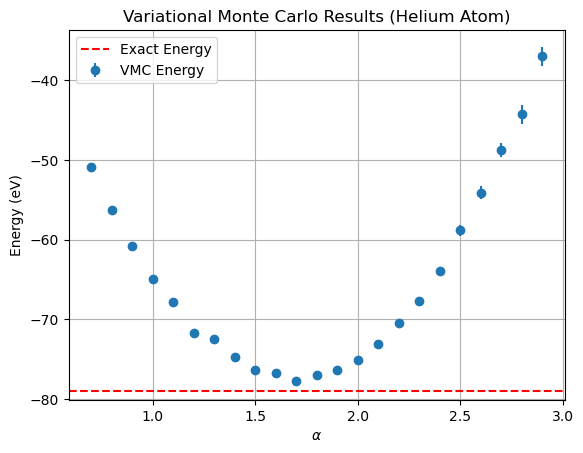

In [11]:
import numpy as np

# Define the trial wavefunction (not used explicitly in this example)
def trial_wavefunction_helium(r1, r2, alpha):
    return np.exp(-alpha * (r1 + r2))

# Define the local energy
def local_energy_helium(coord1, coord2, alpha, Z=2):
    [r1, costh1, ph1] = coord1
    [r2, costh2, ph2] = coord2
    kinetic = -0.5 * alpha**2 * (1 + 1)  # Two electrons
    kinetic += (1 / r1 + 1 / r2) * alpha
    potential_nucleus = -Z * (1 / r1 + 1 / r2)
    sinth1 = np.sqrt(1 - costh1**2)
    sinth2 = np.sqrt(1 - costh2**2)
    r12 = np.sqrt(r1**2 + r2**2 - 2 * r1 * r2 * (costh1 * costh2 + sinth1 * sinth2 * np.cos(ph1 - ph2)))
    potential_electron_electron = 1 / r12
    return kinetic + potential_nucleus + potential_electron_electron

def sample_coordinates(n_samples):
    return [
        [np.random.gamma(shape=3, scale=1/(2.*alpha)),
            np.random.uniform(-1, 1),
            np.random.uniform(0, 2*np.pi)]  
            for i in range(n_samples)]

# Variational Monte Carlo for Helium
def variational_monte_carlo_helium(alpha, n_samples):
    # Sample coordinates (including angles)
    r1_samples = sample_coordinates(n_samples)
    r2_samples = sample_coordinates(n_samples)
    # Calculate local energies
    local_energies = [local_energy_helium(r1, r2, alpha) for r1, r2 in zip(r1_samples, r2_samples)]
    return np.mean(local_energies), np.var(local_energies), np.std(local_energies) / np.sqrt(n_samples)


# Print results
# Vary alpha and compute energies
alphas = np.arange(0.7, 3., 0.1)
n_samples = 10000

energies = []
errors = []

# Print results
for alpha in alphas:
    # Run VMC
    mean_energy, variance, error = variational_monte_carlo_helium(alpha, n_samples)
    # Append
    energies.append(mean_energy)
    errors.append(error)
    # Print results
    print(f'Alpha: {alpha}, Mean Energy: {mean_energy:.5f}, Variance: {variance:.5f}, Error: {error:.5f}')

# Units (convert to eV)
energies = np.array(energies) * rydberg_energy * 2
errors = np.array(errors) * rydberg_energy * 2
helium_GS_literature = -79.005154539  # He ground state energy in eV

# Plotting the results
import matplotlib.pyplot as plt
plt.errorbar(alphas, energies, yerr=errors, fmt='o', label='VMC Energy')
plt.axhline(y=helium_GS_literature, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('${\\alpha}$')
plt.ylabel('Energy (eV)')
plt.title('Variational Monte Carlo Results (Helium Atom)')
plt.legend()
plt.grid()
plt.show()